Name:   Qifan Chen
USCID:  9166932624
Github: cqftx001


(b):
i.
How many rows are in this data set? How many columns? What do the rows
and columns represent?
ii.
Make pairwise scatterplots (scatter matrix) of all the varianbles in the data set
including the predictors (independent variables) with the dependent variable.
Describe your findings.
iii.
What are the mean, the median, range, first and third quartiles, and in-
terquartile ranges of each of the variables in the dataset? Summarize them
in a table.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import sklearn.preprocessing as pp
import random
import sklearn.neighbors as neigh
import sklearn.preprocessing as pre
import time

In [54]:
#read file
data = pd.read_excel(r'../data/Folds5x2_pp.xlsx')

In [55]:
print('--------------------------------------')
print('Rows : ', data.shape[0])
print('Columns : ', data.shape[1])
print('Rows represent a set of measurements taken at a powerplant at an arbritary time between 2006 and 2011.')
print('Each column represents a specific measurement, such as Temperature, pressure, and humidity')
print('--------------------------------------')

--------------------------------------
Rows :  9568
Columns :  5
Rows represent a set of measurements taken at a powerplant at an arbritary time between 2006 and 2011.
Each column represents a specific measurement, such as Temperature, pressure, and humidity
--------------------------------------


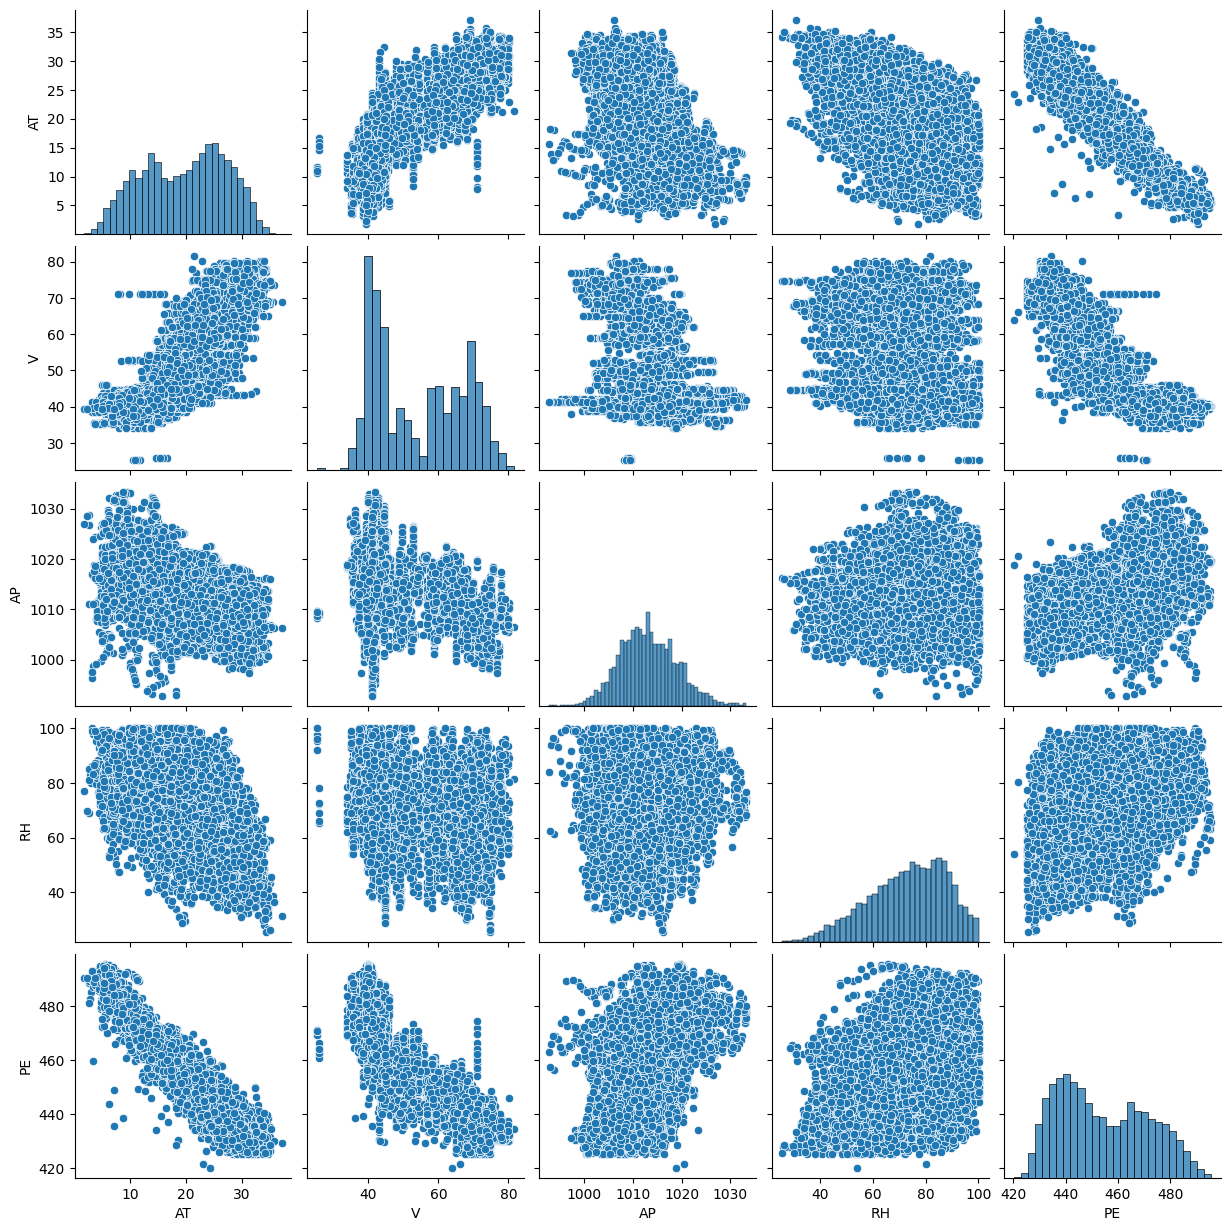

In [56]:
#pairwise scatterplots
sns.pairplot(data);

From the plots, we can conclude that
The higher the ambient temperature (AT), the lower the energy output (PE).
The higher the exhaust vacuum (V), the lower the energy output (PE).
As the ambient temperature (AT) increases, the exhaust vacuum (V) levels also increase.

In [57]:
v = ['AT','V','AP','RH','PE']; # column titles
vL = np.arange(len(v));
n = ['Mean','Median','Range','1st Quartile','3rd Quartile','Interquartile']; # data titles
nL = np.arange(len(n));
statData = np.zeros([len(nL),len(vL)]);

for j in vL:
    #the mean
    statData[0,j] = data[v[j]].mean()
    #the median
    statData[1,j] = data[v[j]].median()
    #calculate the range
    statData[2,j] = data[v[j]].max() - data[v[j]].min()
    #calculate the 1st quantile of each set
    statData[3,j] = np.quantile(data[v[j]], 0.25)
    #calculate the 3rd quantile of each set
    statData[4,j] = np.quantile(data[v[j]], 0.75)
    #Interquartile
    statData[5,j] = np.quantile(data[v[j]], 0.75) - np.quantile(data[v[j]], 0.25)

d = {'Data':n,'AT':statData[:,0],'V':statData[:,1],'AP':statData[:,2],'RH':statData[:,3],'PE':statData[:,4]}

statTable = pd.DataFrame(data = d);
statTable

,Data,AT,V,AP,RH,PE
0,Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
1,Median,20.345000,52.080000,1012.940000,74.975000,451.550000
2,Range,35.300000,56.200000,40.410000,74.600000,75.500000
3,1st Quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
4,3rd Quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
5,Interquartile,12.210000,24.800000,8.160000,21.502500,28.680000


(c):
For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks

reference:
https://online.stat.psu.edu/stat501/lesson/1
https://www2.stat.duke.edu/courses/Fall18/sta210.001/assignments/labs/lab_04.html

In [58]:
X = np.zeros([data[v[1]].size,2])
X[:,0] = np.ones(data[v[1]].size)
y = data[v[4]]

output = np.zeros([len(vL),3])

for i in vL:
    X[:,1] = data[v[i]]
    sReg = lm.LinearRegression().fit(X,y)

    output[i,0] = sReg.intercept_;
    output[i,1] = sReg.coef_[1];
    output[i,2] = sReg.score(X,y);

d = {'Data':v,'b0':output[:,0],'b1':output[:,1],'r2':output[:,2]}

statTable = pd.DataFrame(data = d);

statTable

,Data,b0,b1,r2
0,AT,4.970341e+02,-2.171320,0.898948
1,V,5.178015e+02,-1.168135,0.756518
2,AP,-1.055261e+03,1.489872,0.268769
3,RH,4.209618e+02,0.455650,0.151939
4,PE,-2.046363e-12,1.000000,1.000000


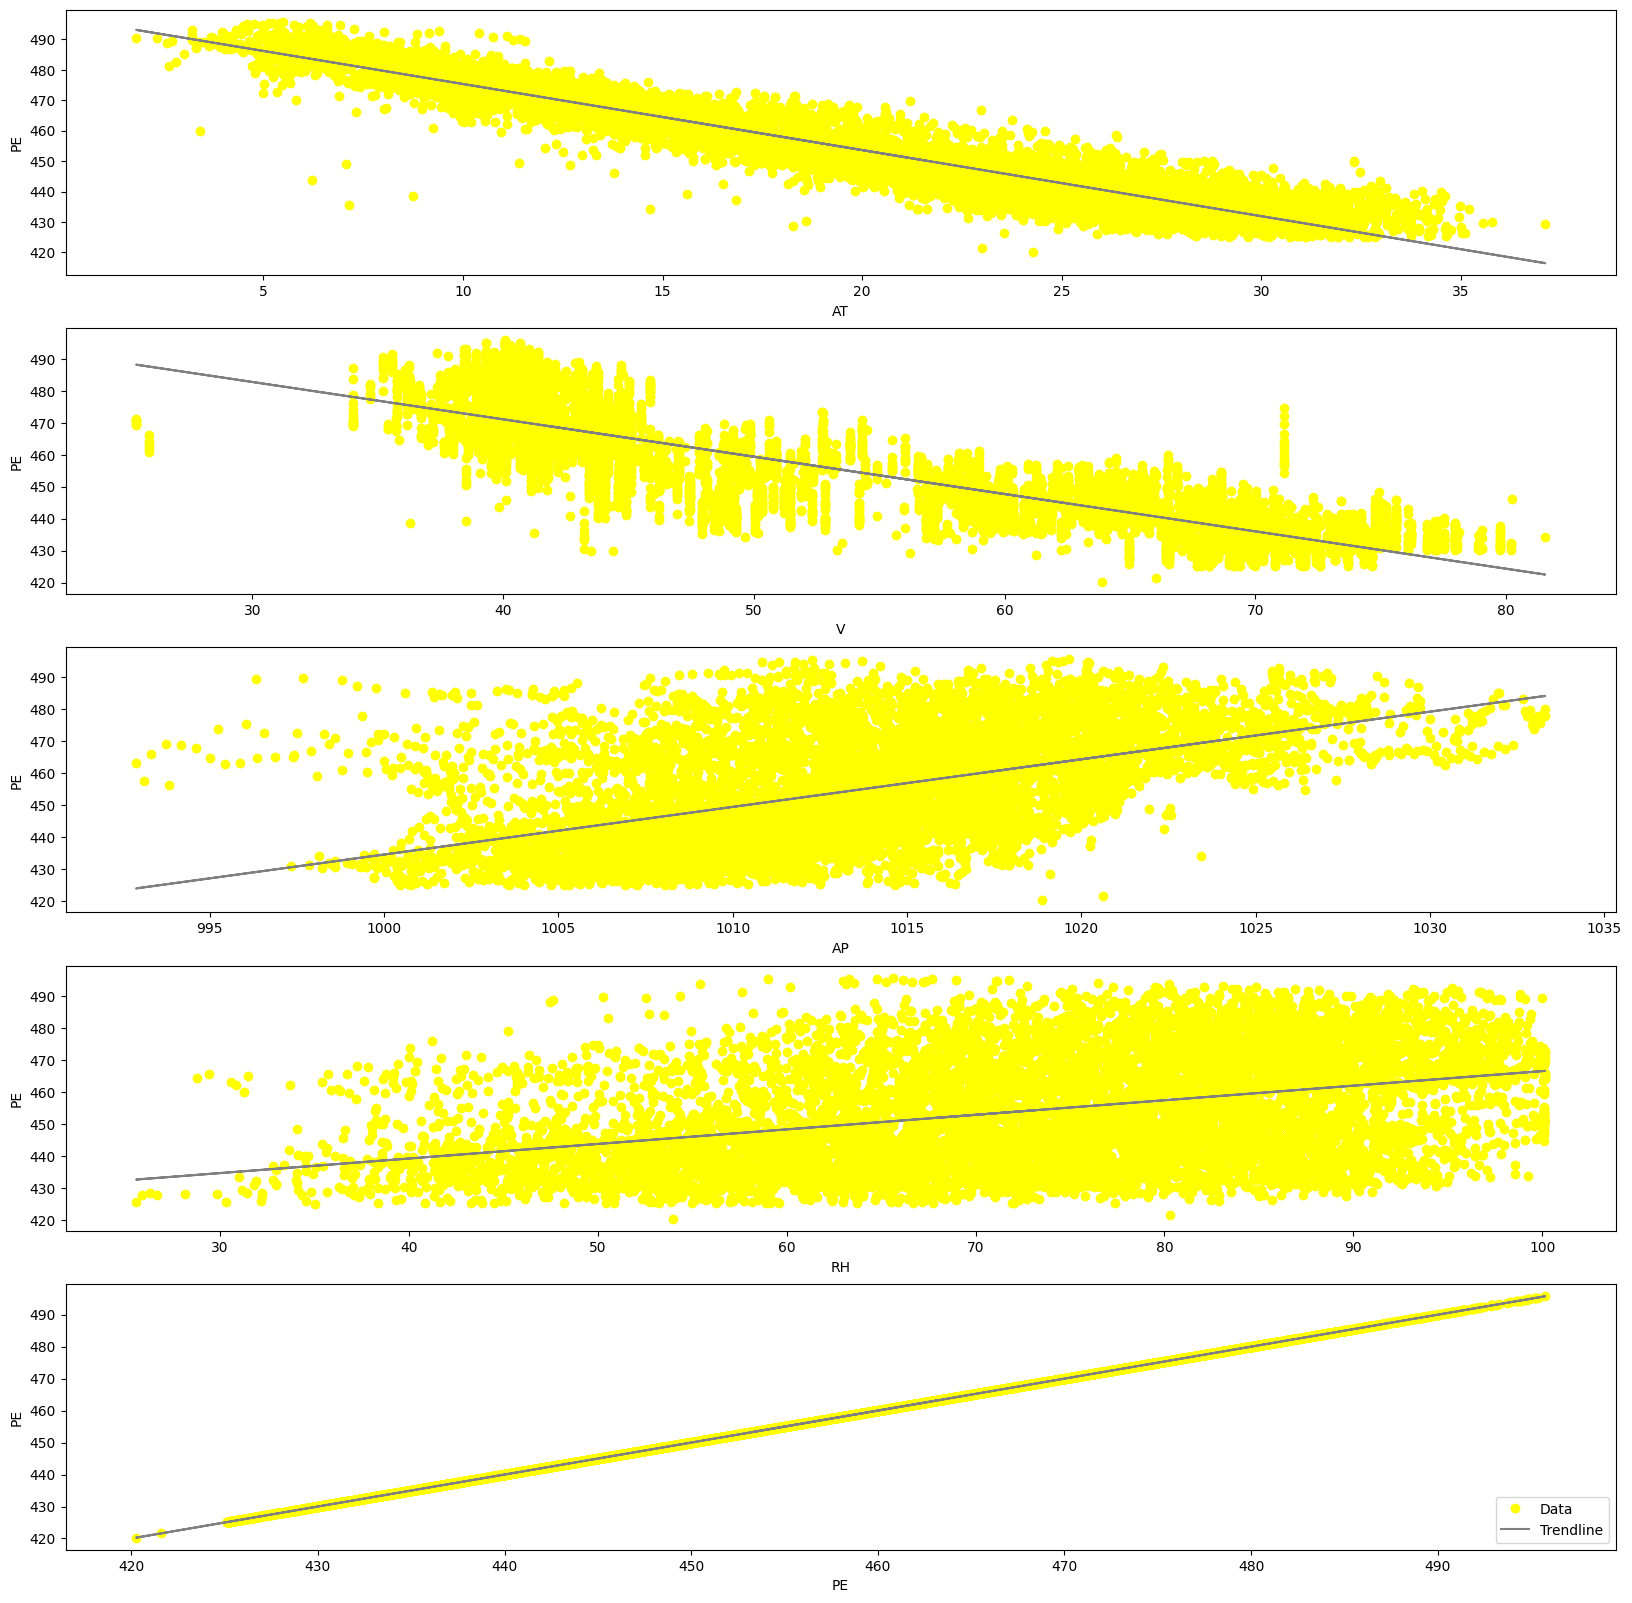

In [59]:
figs, axs = plt.subplots(5,1);
for i in vL:
    y_plot = output[i,0] + output[i,1]*data[v[i]]; # create x-axis trendline
    axs[i].plot(data[v[i]],data[v[4]], 'o', c='yellow')
    axs[i].plot(data[v[i]],y_plot, c='grey')
    axs[i].set_xlabel(v[i])
    axs[i].set_ylabel(v[4])

axs[4].legend(['Data','Trendline'], loc = 'lower right')
figs.set_figheight(20)
figs.set_figwidth(20)

From the plots，we can see that there is a statistically significant association between the response variable (PE) and the predictor variables AT and V. These data are compared with PE v. PE, which has an expected r2 value of 1. I would remove those isolated outliers that are clearly deviated from the data point population, which is visible on the graph.


(d): Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?
reference: https://www.statology.org/anova-f-value-p-value/

In [60]:
y = data['PE'];
X = sm.add_constant(data[['AT','V','AP','RH']]);

mReg = lm.LinearRegression().fit(X,y)

#print least squares multiple regression summary
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:58   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

Observations indicate that at least one predictor is statistically significant, and all predictors are statistically significant.

(e):
How do your results from 4c compare to your results from 4d? Create a plot
displaying the univariate regression coefficients from 4c on the x-axis, and the
multiple regression coefficients from 4d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis

reference:


Simple Regression Coefficients :  [-2.17131996 -1.16813513  1.48987167  0.4556501 ]
Multiple Regression Coefficient :  [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]


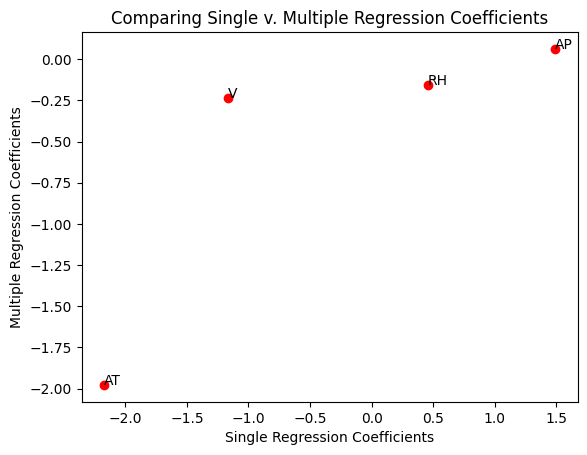

In [61]:
# print simple regression coefficient
print('Simple Regression Coefficients : ', output[0:4,1])
# print multiple regression coefficient
print('Multiple Regression Coefficient : ', mReg.coef_[1:5])

# plot data
plt.plot(output[0:4,1], mReg.coef_[1:5], 'o', c='red')
plt.xlabel('Single Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparing Single v. Multiple Regression Coefficients')

txt = ['AT', 'V', 'AP', 'RH']

for i, txt in enumerate(txt):
    plt.annotate(txt, (output[i,1], mReg.coef_[i+1]))

(f):
Is there evidence of nonlinear association between any of the predictors and the
response?

reference:

In [62]:

y = data[v[4]]; # store dependent variable

out = np.zeros([len(vL),5]) # create data table to collect poly regression data
X = np.ones([len(data['PE']),4]) # create empty matrix for X

# for loop setup
for i in vL:
    X[:,1] = data[v[i]]
    X[:,2] = data[v[i]]**2
    X[:,3] = data[v[i]]**3
    pReg = lm.LinearRegression().fit(X,y)

    out[i,0] = pReg.intercept_; # grab b0 coefficient
    out[i,1] = pReg.coef_[1]; # grab b1 coefficient
    out[i,2] = pReg.coef_[2]; # grab b2 coefficient
    out[i,3] = pReg.coef_[3]; # grab b2 coefficient
    out[i,4] = pReg.score(X,y) # grab r2 value

d = {'Data':v,'b0':out[:,0],'b1':out[:,1],'b2':out[:,2], 'b3':out[:,3], 'r2':out[:,4]} 

statTable = pd.DataFrame(data = d); # create dataframe to populate

statTable

,Data,b0,b1,b2,b3,r2
0,AT,4.927281e+02,-0.610346,-1.251382e-01,2.674852e-03,0.911883
1,V,5.541468e+02,-2.144377,-2.712285e-03,1.343571e-04,0.775022
2,AP,5.236220e+06,-15460.866205,1.521625e+01,-4.991160e-03,0.297543
3,RH,4.684135e+02,-1.729211,3.214517e-02,-1.521880e-04,0.153743
4,PE,-2.525110e-08,1.000000,-9.784456e-14,1.438802e-16,1.000000


(g):
Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant

reference:
https://www.scribbr.com/statistics/statistical-significance/
https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/anova/how-to/one-way-anova/interpret-the-results/key-results/

In [63]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

predictors = data[['AT', 'V', 'AP', 'RH']]
polyG = PolynomialFeatures(2, interaction_only=True)
Xn = polyG.fit_transform(predictors)

# 创建特征名称
names = ['1'] + [f'x{i+1}' for i in range(predictors.shape[1])]
for i in range(2, polyG.degree + 1):
    for comb in combinations(predictors.columns, i):
        names.append('*'.join(comb))

Xdf = pd.DataFrame(data=Xn, columns=names)
print(sm.OLS(y, Xdf).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:58   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            685.7825     78.640      8.721      0.0

If the p-value of the data is less than 0.01 and the pairwise combination of predictors is also significant, then those factors considered to be statistically significant include AT (temperature), V (compressor vibration velocity), AP (ambient pressure), RH (relative humidity), and their combinations ATV, ATRH, and V*AP.

(h):
Can you improve your model using possible interaction terms or nonlinear asso-
ciations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a re-
gression model involving all possible interaction termsXiXjas well as quadraticnonlinearitiesX2j, and remove insignificant variables using p-values (be carefulabout interaction terms). Test both models on the remaining points and report your train and test MSEs.

reference:
https://www.statsmodels.org/stable/examples/index.html
https://scikit-learn.org/stable/supervised_learning.html#linear-model
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [64]:
import time
import random
from sklearn.linear_model import LinearRegression

t = time.time()  # start timer

L = len(data['PE'])  # create variable for length of data
trainRand = pd.DataFrame(columns=v)
random.seed(1)  # seed the random number generator
z = random.random()  # generate random number

tStart = int(np.floor(z * L * 0.3))  # find start index in the first 30% of data
tEnd = int(tStart + np.floor(L * 0.7) + 1)  # find end index for 70% of dataframe

trainRand = pd.concat([trainRand, data.loc[tStart:tEnd].reset_index(drop=True)], ignore_index=True)  # create training dataframe with 70% of dataframe
testRand = pd.concat([data.loc[:tStart], data.loc[tEnd:]], ignore_index=True)  # create test dataframe with remaining 30% of dataframe

yh = trainRand['PE']
Xh = sm.add_constant(trainRand[['AT', 'V', 'AP', 'RH']])
Xtest = sm.add_constant(testRand[['AT', 'V', 'AP', 'RH']])

# Train fully multiple regression model - without nonlinearities
hReg1 = LinearRegression().fit(Xh, yh)  # create linear regression model for Xh predictors and yh output

yh1test = hReg1.predict(Xtest)  # predict y values for test dataset using the trained model
yh1train = hReg1.predict(Xh)  # predict y values for training dataset using the trained model

Xh1df = pd.DataFrame(data=Xh, columns=['const', 'AT', 'V', 'AP', 'RH'])  # create DataFrame to add titles to variables
model1 = sm.OLS(yh, Xh1df).fit()  # fit ordinary least squares multiple regression model

print('MODEL 1 (WITHOUT INTERACTIONS)')
print(model1.summary())  # print the summary of the multiple regression model




MODEL 1 (WITHOUT INTERACTIONS)
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.235e+04
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:58   Log-Likelihood:                -19603.
No. Observations:                6699   AIC:                         3.922e+04
Df Residuals:                    6694   BIC:                         3.925e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        450.0225

Since all predictors have been shown to be statistically significant via p-values, we continue to treat errors for all predictors in the regression.

In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polyH = PolynomialFeatures(2)  # create class for interaction of predictors
Xh2 = polyH.fit_transform(trainRand[['AT', 'V', 'AP', 'RH']])  # create array for interaction of predictors and predictors^2
Xtest2 = polyH.transform(testRand[['AT', 'V', 'AP', 'RH']])

# Generate column names for the polynomial features
powers = polyH.powers_
feature_names = ['AT', 'V', 'AP', 'RH']
names = []
for i in powers:
    name = '*'.join([f'{feature_names[j]}^{p}' for j, p in enumerate(i) if p > 0])
    names.append(name)
Xh2df = pd.DataFrame(data=Xh2, columns=names)

Xh2df = pd.DataFrame(data=Xh2, columns=names)  # create DataFrame to add titles to variables
model2 = sm.OLS(yh, Xh2df).fit()  # fit ordinary least squares multiple regression model

print('MODEL 2 (WITH INTERACTIONS)')
print(model2.summary())  # print the summary of the multiple regression model



MODEL 2 (WITH INTERACTIONS)
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7399.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:58   Log-Likelihood:                -19137.
No. Observations:                6699   AIC:                         3.830e+04
Df Residuals:                    6684   BIC:                         3.841e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
           -6743.6341   

The following predictors have been determined statistically significant and will be included: AT(1), V(2), AP(3), RH(4), AT^2(5), AT*V(6), AT*RH(8), AP^2(12), AP*RH(13), RH^2(14)

In [66]:
Xh2_rev = np.zeros([Xh2.shape[0],10])
Xtest2_rev = np.zeros([Xtest2.shape[0],10])
stat_sig = np.array([1,2,3,4,5,6,8,12,13,14]) # take the columns that are statistically significant from Xh2

for i,stat_sig in enumerate(stat_sig):
    Xh2_rev[:,i] = Xh2[:,stat_sig] # populate revised Xh2 with only stat sig predictors
    Xtest2_rev[:,i] = Xtest2[:,stat_sig]

# Train fully multiple regression model - w/ nonlinearities
hReg2 = lm.LinearRegression().fit(Xh2_rev,yh)

yh2test = hReg2.predict(Xtest2_rev) # compares test DF to training lin reg
yh2train = hReg2.predict(Xh2_rev)# compares train DF to training lin reg

In [67]:
error1test = sum((testRand['PE']-yh1test)**2)/len(yh1test); # calculate MSE of hReg1 test set
error1train = sum((trainRand['PE']-yh1train)**2)/len(yh1train); # calculate MSE of hReg1 test set

print('Model 1 (w/o interactions) test MSE : ', error1test)
print('Model 1 (w/o interactions) training MSE : ', error1train)

# Calculate errors for multiple regression w/o non-linearities

error2test = sum((testRand['PE']-yh2test)**2)/len(yh2test); # calculate MSE of hReg1 test set
error2train = sum((trainRand['PE']-yh2train)**2)/len(yh2train); # calculate MSE of hReg1 test set

print('Model 2 (w/ interactions) test MSE : ', error2test)
print('Model 2 (w/ interactions) training MSE : ', error2train)

Model 1 (w/o interactions) test MSE :  21.68952776307078
Model 1 (w/o interactions) training MSE :  20.38283442292524
Model 2 (w/ interactions) test MSE :  19.041177734062654
Model 2 (w/ interactions) training MSE :  17.781868920528392


From the MSE output and R² values, it can be determined that the model including nonlinear factors is more accurate, while the interaction term has limited improvement in accuracy, but increases the complexity of the model. These factors need to be weighed when choosing the optimal regression method.

In [68]:
# Part I - KNN Regression using testRand and trainRand
t = time.time();

l = np.arange(100);
k = l + 1; # define k value for KNN

# Raw Features
yi = trainRand['PE'];
Xi = trainRand[['AT','V','AP','RH']];
yTi = testRand['PE'];
Xtesti = testRand[['AT','V','AP','RH']];


# Normalized Features
# MM_scaler = pre.MinMaxScaler()
yii = (yi - yi.min())/(yi.max() - yi.min());
Xii = pre.normalize(Xi, axis=0); # normalize each feature
yTii = (yTi - yTi.min())/(yTi.max() - yTi.min());
Xtestii = pre.normalize(Xtesti, axis=0); # normalize each feature

# Error
errori = np.zeros([len(k),4]) # [raw training, raw test, normal training, normal test]
ytraini = np.zeros([len(Xi),2]) # [raw train, normal train]
ytesti = np.zeros([len(Xtesti),2]) # [raw test, normal test]

for i in l:
    KNN = neigh.KNeighborsRegressor(n_neighbors = k[i])
    
    # Find KNN using raw features
    knnR = KNN.fit(Xi,yi)
    ytraini[:,0] = KNN.predict(Xi) # predict training output
    errori[i,0] = sum((yi - ytraini[:,0])**2)/len(yi)
    ytesti[:,0] = KNN.predict(Xtesti) # predict test output
    errori[i,1] = sum((yTi - ytesti[:,0])**2)/len(yi) # calculate MSE for test set
    
    # Find KNN using normal features
    knnN = KNN.fit(Xii,yii)
    ytraini[:,1] = KNN.predict(Xii) # predict training output
    errori[i,2] = sum((yii - ytraini[:,1])**2)/len(yii)
    errori[i,2] = errori[i,2] * (yi.max() - yi.min()) # scaling error back up to post-processing
    ytesti[:,1] = KNN.predict(Xtesti) # predict test output
    errori[i,3] = sum((yTii - ytesti[:,1])**2)/len(yii) # calculate MSE for test set
    errori[i,3] = errori[i,3] * (yi.max() - yi.min()) # scaling error back up to post-processing

    
# Determine K* for both raw and normalized features
indexR = np.argmin(errori[:,1])
indexN = np.argmin(errori[:,3])

# Output test errors
print('Raw Features k* = ', k[indexR], ', min MSE = ', errori[indexR,1])
print('Normal Features k* = ', k[indexN], ', min MSE = ', errori[indexN,3])

elapsedKNN = time.time() - t;

/Library/Python/3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/Library/Python/3.9/si

Raw Features k* =  5 , min MSE =  6.908680315868042
Normal Features k* =  100 , min MSE =  3.32515205622978


/Library/Python/3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


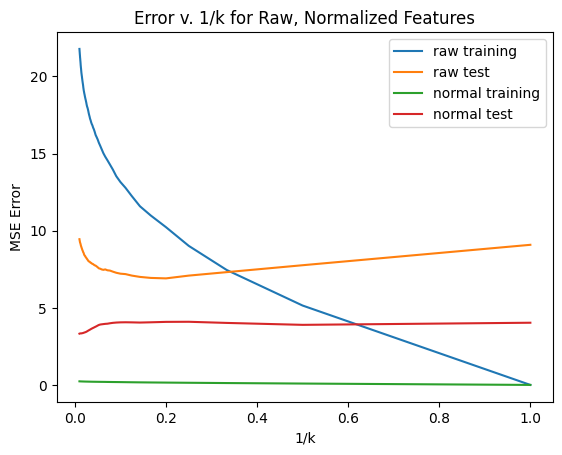

In [69]:
plt.plot(1/k,errori[:,0]);
plt.plot(1/k,errori[:,1]);
plt.plot(1/k,errori[:,2]);
plt.plot(1/k,errori[:,3]);

plt.title('Error v. 1/k for Raw, Normalized Features');
plt.xlabel('1/k');
plt.ylabel('MSE Error');
plt.legend(['raw training', 'raw test', 'normal training', 'normal test'],loc = 'upper right');

In [70]:
t = time.time()
elapsedLIN = time.time() - t
print('--------------------------------------------')
print('         LINEAR REGRESSION           ')
print('Model 1 (w/o interactions) test MSE : ', error1test)
print('Model 1 (w/o interactions) training MSE : ', error1train)
print('Model 2 (w/ interactions) test MSE : ', error2test)
print('Model 2 (w/ interactions) training MSE : ', error2train)
print('Time to perform Model 1 and Model 2 computations : ', elapsedLIN, 'seconds')
print('--------------------------------------------')

print('--------------------------------------------')
print('         KNN REGRESSION              ')
print('Raw Features k* = ', k[indexR], ', min MSE = ', errori[indexR,1])
print('Normal Features k* = ', k[indexN], ', min MSE = ', errori[indexN,3])
print('Time to perform KNN computations : ', elapsedKNN, 'seconds')
print('--------------------------------------------')

--------------------------------------------
         LINEAR REGRESSION           
Model 1 (w/o interactions) test MSE :  21.68952776307078
Model 1 (w/o interactions) training MSE :  20.38283442292524
Model 2 (w/ interactions) test MSE :  19.041177734062654
Model 2 (w/ interactions) training MSE :  17.781868920528392
Time to perform Model 1 and Model 2 computations :  1.5735626220703125e-05 seconds
--------------------------------------------
--------------------------------------------
         KNN REGRESSION              
Raw Features k* =  5 , min MSE =  6.908680315868042
Normal Features k* =  100 , min MSE =  3.32515205622978
Time to perform KNN computations :  17.958136081695557 seconds
--------------------------------------------


We can clearly see that for this dataset, the KNN regression is more accurate, resulting in smaller errors. The tradeoff for accuracy is computational complexity, which is proportional to the time required to perform regression modeling. Here, KNN takes significantly longer than linear regression.

Lin Reg Model 1 (w/o interactions) : Lowest computational complexity, highest error
Lin Reg Model 2 (w/ interactions) : Medium computational complexity, medium error
KNN Regression : Highest computational complexity, lowest error